In [95]:
import pandas as pd
import numpy as np
from numpy.random import seed
import statistics

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns

In [96]:
seed(100)

In [97]:
df = pd.read_csv('./DATA/online_transaction_dataset_processed.csv')
attr = df.columns.tolist()
np.transpose(attr)

array(['Unnamed: 0', 'Administrative', 'Administrative_Duration',
       'Informational', 'Informational_Duration', 'ProductRelated',
       'ProductRelated_Duration', 'BounceRates', 'ExitRates',
       'PageValues', 'SpecialDay', 'Month', 'OperatingSystems', 'Browser',
       'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue'],
      dtype='<U23')

In [98]:
df.head()

,Unnamed: 0,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.0,0.0,9,1,1,1,1,0,0,0
1,1,0.0,0.0,0.0,0.0,2.0,64.000000,0.000000,0.100000,0.0,0.0,9,2,2,1,2,0,0,0
2,3,0.0,0.0,0.0,0.0,2.0,2.666667,0.050000,0.140000,0.0,0.0,9,3,2,2,4,0,0,0
3,4,0.0,0.0,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.0,0.0,9,3,3,1,4,0,1,0
4,5,0.0,0.0,0.0,0.0,19.0,154.216667,0.015789,0.024561,0.0,0.0,9,2,2,1,3,0,0,0


In [99]:
df['Revenue'].value_counts()

0    10375
1     1908
Name: Revenue, dtype: int64

In [100]:
df['Month'].value_counts()

0    3357
1    2995
2    1884
3    1727
4     549
5     448
6     433
7     431
8     288
9     171
Name: Month, dtype: int64

In [101]:
df[attr[1:len(attr)]].head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.0,0.0,9,1,1,1,1,0,0,0
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.000000,0.100000,0.0,0.0,9,2,2,1,2,0,0,0
2,0.0,0.0,0.0,0.0,2.0,2.666667,0.050000,0.140000,0.0,0.0,9,3,2,2,4,0,0,0
3,0.0,0.0,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.0,0.0,9,3,3,1,4,0,1,0
4,0.0,0.0,0.0,0.0,19.0,154.216667,0.015789,0.024561,0.0,0.0,9,2,2,1,3,0,0,0


In [102]:
np.transpose(attr[1:len(attr)]), attr[len(attr)-1]

(array(['Administrative', 'Administrative_Duration', 'Informational',
        'Informational_Duration', 'ProductRelated',
        'ProductRelated_Duration', 'BounceRates', 'ExitRates',
        'PageValues', 'SpecialDay', 'Month', 'OperatingSystems', 'Browser',
        'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue'],
       dtype='<U23'),
 'Revenue')

In [103]:
df[attr[len(attr)-1]].value_counts()

0    10375
1     1908
Name: Revenue, dtype: int64

In [104]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
from matplotlib import pyplot


from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

In [105]:
x_tr, x_t, y_tr, y_t = train_test_split(df[attr[1:len(attr)-1]], df['Revenue'], random_state=100)

In [106]:
x_tr.shape, x_t.shape, y_tr.shape, y_t.shape

((9212, 17), (3071, 17), (9212,), (3071,))

In [107]:
clf = GradientBoostingClassifier()
clf.fit(x_tr, y_tr)
y_p = clf.predict(x_t)

In [108]:
print(classification_report(y_t, y_p))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94      2621
           1       0.68      0.62      0.65       450

    accuracy                           0.90      3071
   macro avg       0.81      0.78      0.79      3071
weighted avg       0.90      0.90      0.90      3071



In [109]:
print(confusion_matrix(y_t, y_p))

[[2491  130]
 [ 173  277]]


In [110]:
clf_prob = clf.predict_proba(x_t)

In [111]:
clf_probability = clf_prob[:,1]
clf_probability

array([0.68222462, 0.03003092, 0.01783221, ..., 0.0413525 , 0.08005694,
       0.01511847])

In [112]:
df_prob = pd.DataFrame({'clf_prob': clf_probability})

In [113]:
df_prob['clf_prob'].value_counts()

0.003629    72
0.008152    37
0.072989    29
0.005952    25
0.031914    25
            ..
0.227285     1
0.375895     1
0.012181     1
0.023269     1
0.263548     1
Name: clf_prob, Length: 2148, dtype: int64

In [114]:
clf_fpr, clf_tpr, _ = roc_curve(y_t, clf_probability)  
nc_fpr, nc_trp, _ = roc_curve(y_t, np.zeros(len(y_t)))

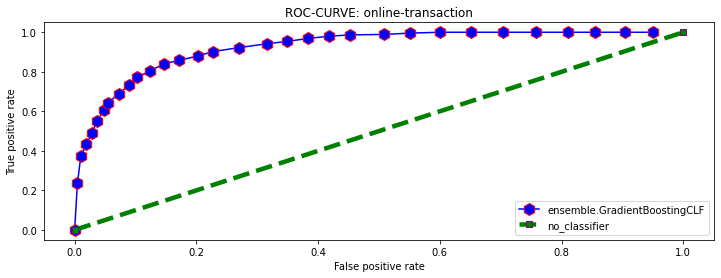

In [115]:
plt.figure(figsize=(12,4))
plt.plot(clf_fpr[::25], clf_tpr[::25], 
         color='blue', label='ensemble.GradientBoostingCLF',
         marker='h', markeredgecolor='red',
         markersize=12)
plt.plot(nc_fpr, nc_trp, 
         color='green', label='no_classifier',
         marker='s', markeredgecolor='purple',
         linestyle='--', linewidth=4.5)
plt.legend()
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC-CURVE: online-transaction')
plt.show()

In [116]:
df_p = pd.DataFrame({'y_t': y_t, 'y_p': y_p})

In [117]:
df_p['y_t'].value_counts()

0    2621
1     450
Name: y_t, dtype: int64

In [118]:
print(confusion_matrix(y_t, y_p))

[[2491  130]
 [ 173  277]]


In [119]:
recall = confusion_matrix(y_t, y_p)[1][1]/(confusion_matrix(y_t, y_p)[1][1]+confusion_matrix(y_t, y_p)[1][0])
recall

0.6155555555555555

In [120]:
precision = confusion_matrix(y_t, y_p)[1][1]/(confusion_matrix(y_t, y_p)[1][1]+confusion_matrix(y_t, y_p)[0][1])
precision

0.6805896805896806

In [121]:
f1_score = statistics.harmonic_mean([recall,precision])
f1_score

0.646441073512252

In [122]:
print(classification_report(y_t, y_p))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94      2621
           1       0.68      0.62      0.65       450

    accuracy                           0.90      3071
   macro avg       0.81      0.78      0.79      3071
weighted avg       0.90      0.90      0.90      3071



In [123]:
AREA_ROC = np.trapz(clf_tpr, clf_fpr)-0.5
AREA_ROC

0.4252151426512356

In [124]:
print('Area under the ROC_CURVE : ', AREA_ROC)

Area under the ROC_CURVE :  0.4252151426512356
